<a href="https://colab.research.google.com/github/mirzzhub/DataAnalysis---Customer-Behavior/blob/main/eda_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('Hackathon_Working_Data.csv')

#list the columns that are to be calculated and just use that array name
#else directly mention them
num_cols = ['BILL_AMT','QTY','VALUE','PRICE']

#to calculate mean, median , standard deviation
mean_val = df[num_cols].mean()

med_val = df[num_cols].median()

std_val = df[['BILL_AMT','QTY','VALUE','PRICE']].std()

#to calculate mode
mode_val = df[['BILL_ID','GRP','SGRP','SSGRP','CMP','BRD','MBRD']].mode()

#to calculate range
range_val = df[num_cols].max() - df[num_cols].min()

#to calculate variance
variance_val =df[num_cols].var()

#to calculate IQR (interquartile range)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
iqr = Q3 - Q1

cor_mat = df[num_cols].corr()

# Display correlation matrix

print("MEAN")
print(mean_val)
print(" ")
print("MEDIAN")
print(med_val)
print(" ")
print("STANDARD DEVIATION")
print(std_val)
print(" ")
print("MODE")
print(mode_val)
print(" ")
print("RANGE")
print(range_val)
print(" ")
print("VARIANCE")
print(variance_val)
print(" ")
print("IQR")
print(iqr)
print(" ")
print("CORRELATION MATRIX:")
print(cor_mat)





MEAN
BILL_AMT    278.754206
QTY           4.105021
VALUE        67.808551
PRICE        52.812982
dtype: float64
 
MEDIAN
BILL_AMT    111.0
QTY           1.0
VALUE        30.0
PRICE        22.0
dtype: float64
 
STANDARD DEVIATION
BILL_AMT    541.398504
QTY          95.666947
VALUE       118.005978
PRICE        84.987730
dtype: float64
 
MODE
  BILL_ID                         GRP           SGRP          SSGRP  \
0   T1521  BISCUITS - CORE & NON CORE  SWEET/COOKIES  SWEET/COOKIES   

              CMP                 BRD        MBRD  
0  BRITANNIA INDS  MARIE GOLD REGULAR  MARIE GOLD  
 
RANGE
BILL_AMT     7292.0
QTY         11999.5
VALUE        3150.0
PRICE        3150.0
dtype: float64
 
VARIANCE
BILL_AMT    293112.340006
QTY           9152.164834
VALUE        13925.410866
PRICE         7222.914302
dtype: float64
 
IQR
BILL_AMT    240.0
QTY           1.0
VALUE        70.0
PRICE        54.0
dtype: float64
 
CORRELATION MATRIX:
          BILL_AMT       QTY     VALUE     PRICE
BILL_AMT  1.0

In [ ]:
grp_data = df.groupby('SGRP')
#first group the data column that is needed and then apply agg function for that grp data

grp_stat = grp_data.agg({
    'BILL_AMT': ['mean','median'],
    'QTY' : ['mean','median'],
    'VALUE': ['mean','median'],
    'PRICE': ['mean','median']
})

def mode_func(x):
  return x.value_counts().index[0]

grp_stat['BILL_AMT','mode'] = grp_data['BILL_AMT'].agg(mode_func)
grp_stat['QTY','mode'] = grp_data['QTY'].agg(mode_func)
grp_stat['VALUE','mode'] = grp_data['VALUE'].agg(mode_func)
grp_stat['PRICE','mode'] = grp_data['PRICE'].agg(mode_func)


print(grp_stat)


                           BILL_AMT                 QTY              VALUE  \
                               mean   median       mean median        mean   
SGRP                                                                         
AEROSOL                  411.444737  266.000  27.368421    1.0  195.302632   
AEROSOLS                 318.187500  153.500   1.000000    1.0  125.562500   
AFTER SHAVE LOTIONS      240.000000  295.000   1.000000    1.0  118.333333   
AGARBATTI                322.259434   60.000   1.452830    1.0   53.056604   
ALKALINE                 149.166667  133.000   2.833333    3.0  115.666667   
...                             ...      ...        ...    ...         ...   
WAFER CREAM               77.847619   55.000   1.142857    1.0   26.523810   
WASHING POWDERS/LIQUIDS  391.161540  192.125   2.195364    1.0   84.314387   
WAX POLISHES             240.000000   44.500   1.166667    1.0   51.500000   
WHITE POWDERS            554.021961  400.000   1.156863    1.0  

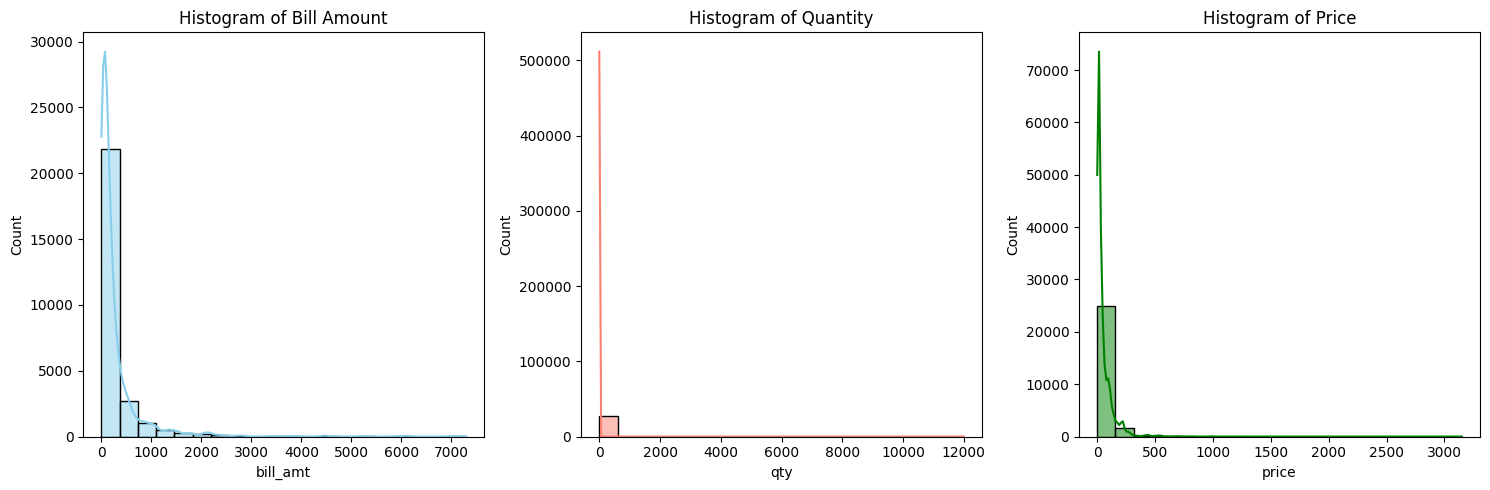

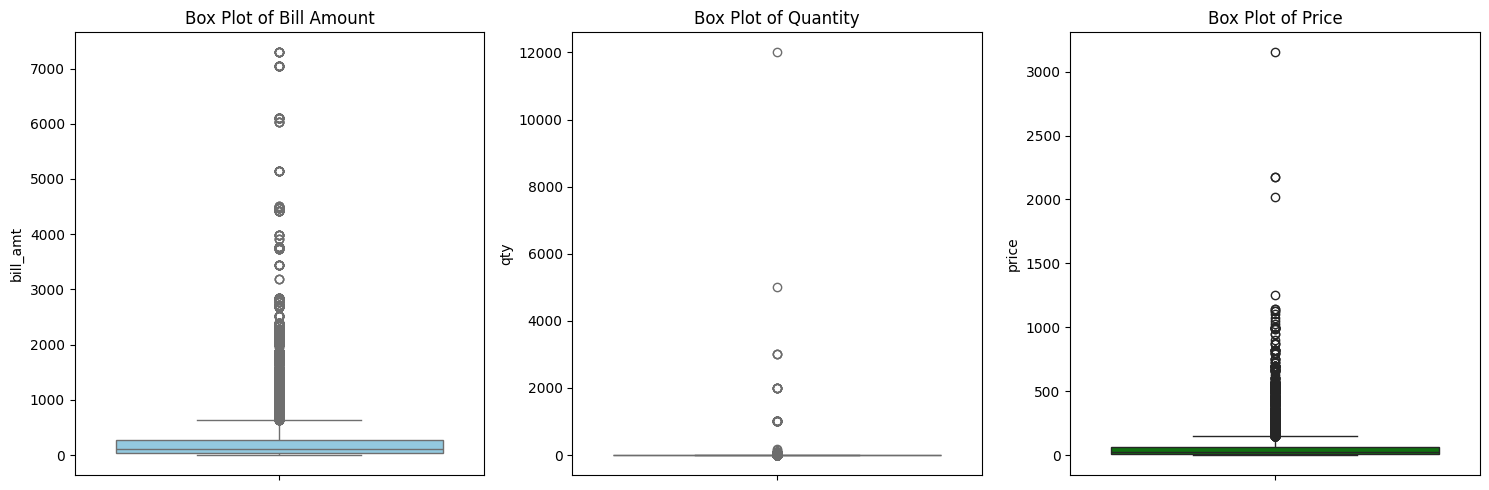

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset into a DataFrame
df = pd.read_csv('Hackathon_Working_Data.csv')
df.columns = df.columns.str.lower()

# Create histograms for bill amount, quantity, and price
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['bill_amt'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Bill Amount')

plt.subplot(1, 3, 2)
sns.histplot(df['qty'], bins=20, kde=True, color='salmon')
plt.title('Histogram of Quantity')

plt.subplot(1, 3, 3)
sns.histplot(df['price'], bins=20, kde=True, color='green')
plt.title('Histogram of Price')

plt.tight_layout()
plt.show()

# Create box plots for bill amount, quantity, and price
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='bill_amt', color='skyblue')
plt.title('Box Plot of Bill Amount')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='qty', color='salmon')
plt.title('Box Plot of Quantity')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='price', color='green')
plt.title('Box Plot of Price')

plt.tight_layout()
plt.show()

CLUSTERING :
1. Select relevant numerical columns for clustering
2. Standardize the data
3. Determine the optimal number of clusters using the elbow method
4. Plot the elbow curve
5. Based on the elbow curve, choose the optimal number of clusters
6. Apply K-means clustering
7. Add cluster labels to the original DataFrame
8. Display cluster centroids
9. Display the count of customers in each cluster


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

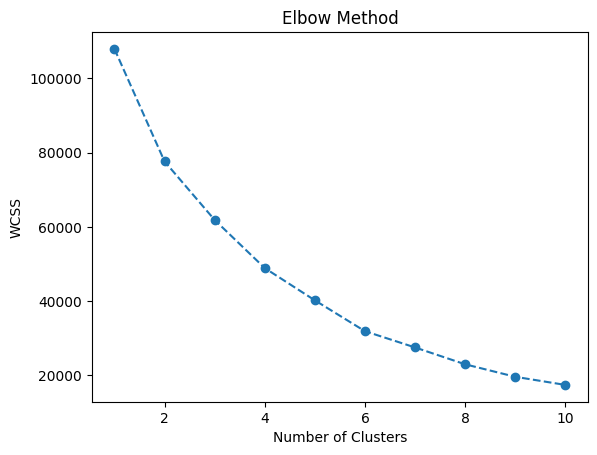

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centroids:
      BILL_AMT           QTY        VALUE       PRICE
0  1205.429764      4.063438   312.681140  235.414638
1   190.975198      3.622328    44.590996   35.533483
2  2185.000000  12000.000000  1116.000000    0.090000

Cluster Counts:
0     2342
1    24642
2        1
Name: Cluster, dtype: int64


In [3]:
#clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1
X = df[['BILL_AMT', 'QTY', 'VALUE', 'PRICE']]

# 2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 4
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 5
n_clusters = 3

# 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 7
df['Cluster'] = clusters

# 8
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centroids:")
print(cluster_centers_df)

# 9
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)

In [4]:
#using apriori algorithm for association analysis

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#1
df_association = df[['BILL_ID', 'MBRD', 'BRD']]
#2
df_association = pd.get_dummies(df_association, columns=['MBRD', 'BRD'], prefix='', prefix_sep='')
#3
df_association = df_association.groupby('BILL_ID').sum()
#4
df_association = df_association.applymap(lambda x: 1 if x > 0 else 0)
#5
frequent_itemsets = apriori(df_association, min_support=0.01, use_colnames=True)
#6
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print("Association Rules:")
print(association_rules_df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.war

Association Rules:
                       antecedents  \
0                          (50-50)   
1                       (GOOD DAY)   
2                          (50-50)   
3                     (MARIE GOLD)   
4                          (50-50)   
..                             ...   
663  (MARIE GOLD REGULAR, SOCIETY)   
664                   (MARIE GOLD)   
665                 (SOCIETY LEAF)   
666           (MARIE GOLD REGULAR)   
667                      (SOCIETY)   

                                        consequents  antecedent support  \
0                                        (GOOD DAY)            0.032690   
1                                           (50-50)            0.096980   
2                                      (MARIE GOLD)            0.032690   
3                                           (50-50)            0.137920   
4                                    (50-50 MSK CK)            0.032690   
..                                              ...                 ...   

APRIORI ALGORITHM :

1. Keeping relevant columns for association analysis
2. Convert product details into one-hot encoded format
3. Group by 'bill id' and sum up the one-hot encoded columns
4. Convert non-zero values to 1 for binary encoding
5. Perform Apriori algorithm to find frequent itemsets
6. Generating  association rules


DONE BY : MIRNALINI E R